In [1]:
!pip install -Uqq nixtla cryptocmd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')
df.head()

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [3]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [4]:
from nixtla import NixtlaClient

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-eprBuzLg5RWsnplTijm5q5PzFk11uhfYD73orCgsEvAu8XCGkzSL8kwDjC0JpRg52N87RumEjYMHxUDM'
)

In [6]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

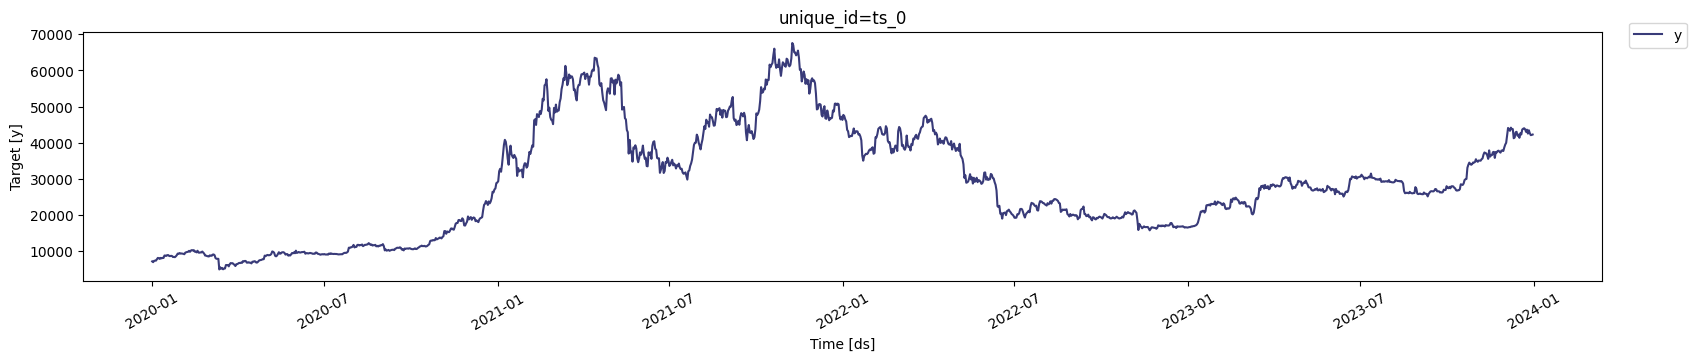

In [7]:
nixtla_client.plot(df)

In [8]:
level = [50,80,90] # confidence levels

fcst = nixtla_client.forecast(df, h=7, level=level)
fcst.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2024-01-01,42269.460,43158.094,44109.047,44971.656,41380.830,40429.875,39567.266
1,2024-01-02,42469.918,43473.383,44361.484,45241.867,41466.453,40578.350,39697.970
2,2024-01-03,42864.080,43443.870,44141.914,45189.230,42284.285,41586.242,40538.926
3,2024-01-04,42881.620,43704.855,44547.176,45160.023,42058.387,41216.066,40603.220
4,2024-01-05,42773.457,44057.190,44881.523,45333.160,41489.723,40665.390,40213.754


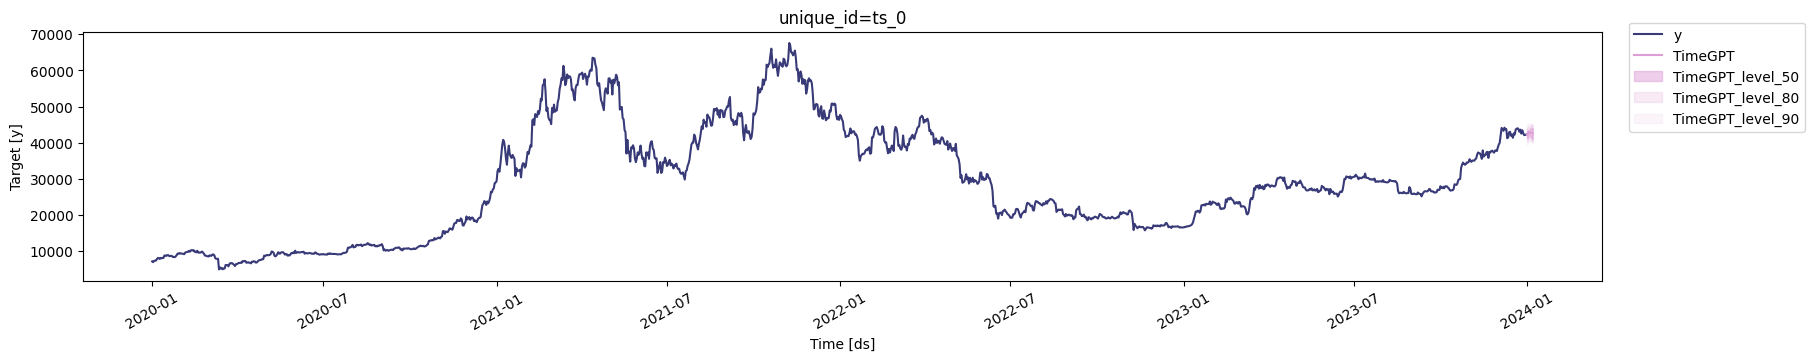

In [9]:
nixtla_client.plot(df, fcst, level=level)

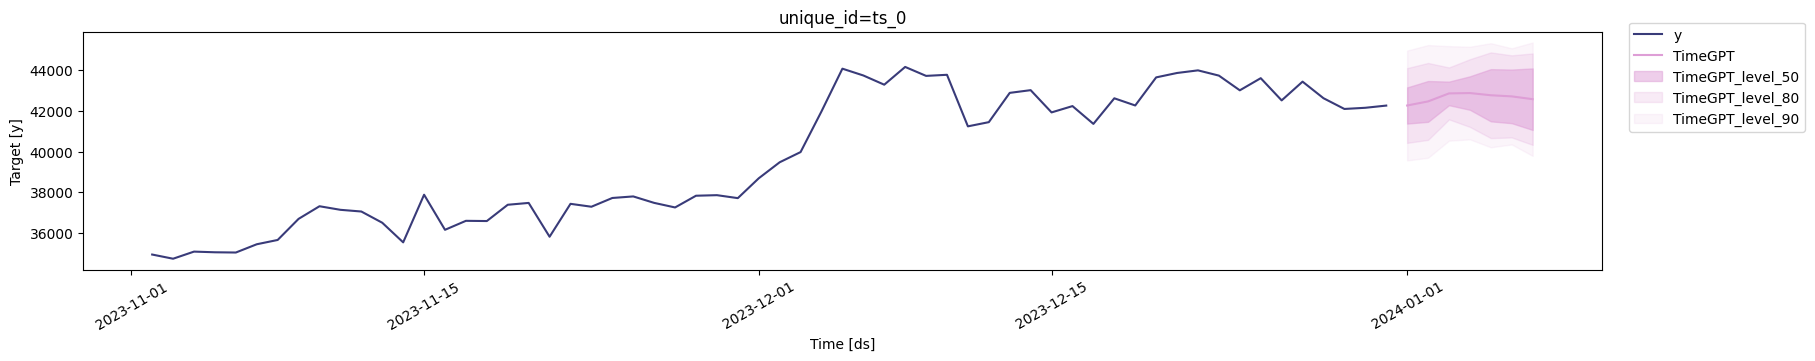

In [10]:
nixtla_client.plot(df, fcst, level=level, max_insample_length=60)

In [11]:
forecast = nixtla_client.forecast(df, h=7, level=level, add_history=True)
forecast.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2020-02-03,9425.740,11229.343,12852.642,13824.121,7622.1370,5998.8384,5027.3594
1,2020-02-04,9568.520,11372.122,12995.421,13966.900,7764.9165,6141.6177,5170.1387
2,2020-02-05,9557.102,11360.704,12984.003,13955.482,7753.4985,6130.1997,5158.7207
3,2020-02-06,9486.128,11289.730,12913.029,13884.509,7682.5250,6059.2260,5087.7470
4,2020-02-07,9475.263,11278.865,12902.164,13873.644,7671.6597,6048.3610,5076.8820


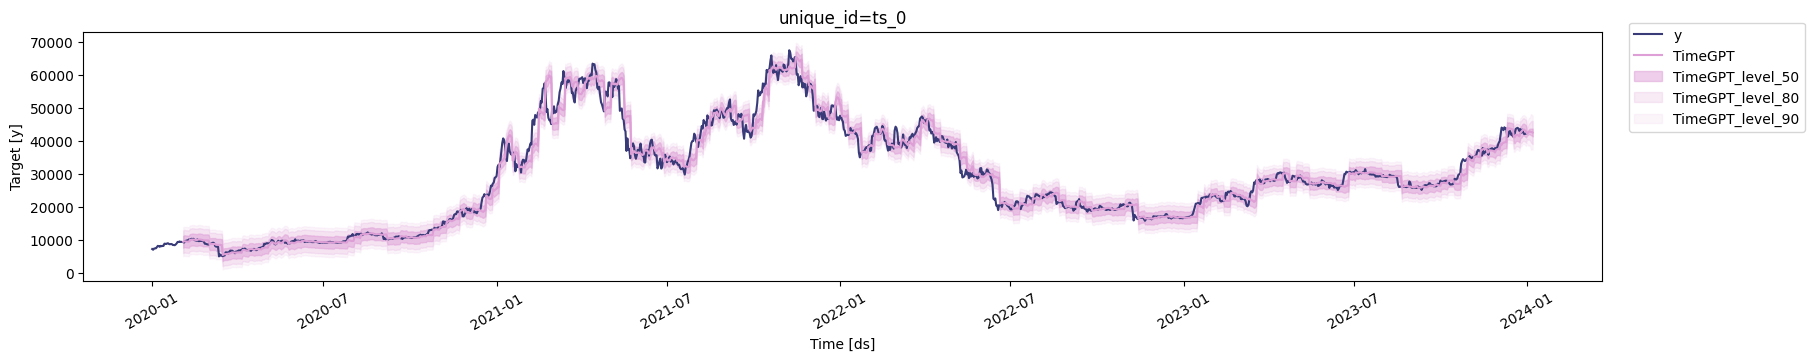

In [12]:
nixtla_client.plot(df, forecast, level=level)

In [13]:
anomalies_df = nixtla_client.detect_anomalies(df)

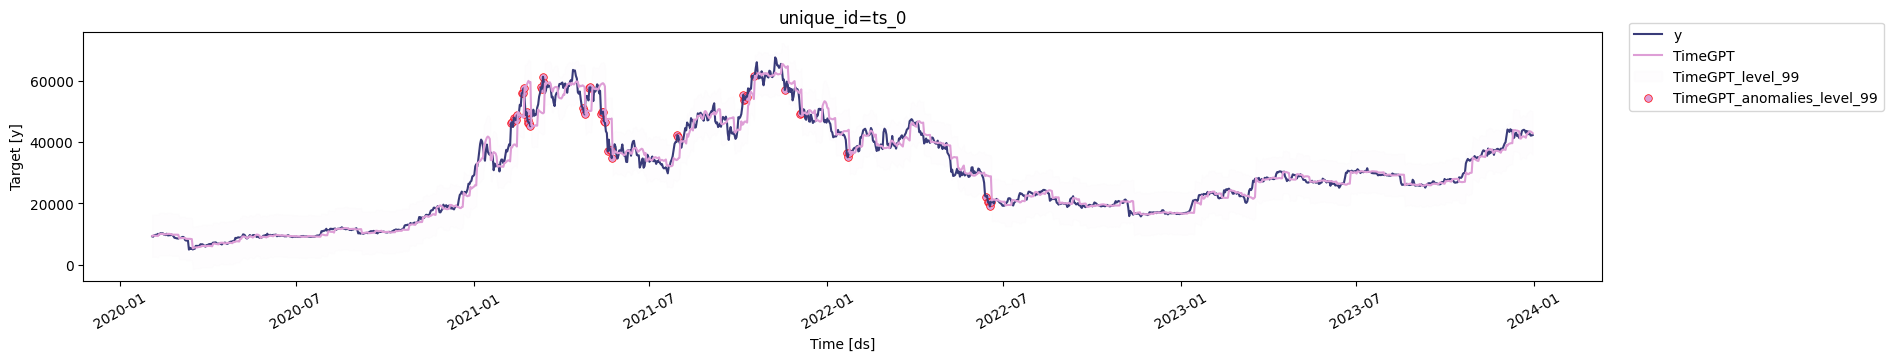

In [14]:
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)